In [2]:
# Customer Churn Prediction - Fully Working Without CSV

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Generate Synthetic Dataset
np.random.seed(42)
n = 1000  # number of customers

data = pd.DataFrame({
    'customerID': ['C'+str(i) for i in range(n)],
    'gender': np.random.choice(['Male', 'Female'], n),
    'SeniorCitizen': np.random.choice([0,1], n),
    'Partner': np.random.choice(['Yes','No'], n),
    'Dependents': np.random.choice(['Yes','No'], n),
    'tenure': np.random.randint(0, 72, n),
    'PhoneService': np.random.choice(['Yes','No'], n),
    'MultipleLines': np.random.choice(['Yes','No','No phone service'], n),
    'InternetService': np.random.choice(['DSL','Fiber optic','No'], n),
    'OnlineSecurity': np.random.choice(['Yes','No','No internet service'], n),
    'OnlineBackup': np.random.choice(['Yes','No','No internet service'], n),
    'DeviceProtection': np.random.choice(['Yes','No','No internet service'], n),
    'TechSupport': np.random.choice(['Yes','No','No internet service'], n),
    'StreamingTV': np.random.choice(['Yes','No','No internet service'], n),
    'StreamingMovies': np.random.choice(['Yes','No','No internet service'], n),
    'Contract': np.random.choice(['Month-to-month','One year','Two year'], n),
    'PaperlessBilling': np.random.choice(['Yes','No'], n),
    'PaymentMethod': np.random.choice(['Electronic check','Mailed check','Bank transfer','Credit card'], n),
    'MonthlyCharges': np.round(np.random.uniform(20,120,n),2),
    'TotalCharges': np.round(np.random.uniform(20,9000,n),2),
    'Churn': np.random.choice(['Yes','No'], n)
})

print("Synthetic dataset generated successfully!")
data.head()

Synthetic dataset generated successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,C0,Male,1,Yes,No,6,No,Yes,No,Yes,...,No internet service,Yes,Yes,No internet service,Month-to-month,Yes,Bank transfer,70.32,7188.03,Yes
1,C1,Female,0,No,No,34,No,No phone service,Fiber optic,No internet service,...,No,No,No,No,Two year,No,Mailed check,66.48,3909.01,No
2,C2,Male,0,No,No,54,Yes,No phone service,No,Yes,...,No internet service,No,Yes,Yes,Month-to-month,Yes,Credit card,119.75,8259.37,Yes
3,C3,Male,0,No,No,13,No,No phone service,Fiber optic,Yes,...,Yes,No,No internet service,No,Two year,No,Mailed check,69.35,4062.12,No
4,C4,Male,0,No,Yes,9,No,No phone service,No,Yes,...,No internet service,Yes,No,Yes,Month-to-month,No,Mailed check,37.84,6703.85,No


              precision    recall  f1-score   support

           0       0.40      0.48      0.44        85
           1       0.55      0.46      0.50       115

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.47       200



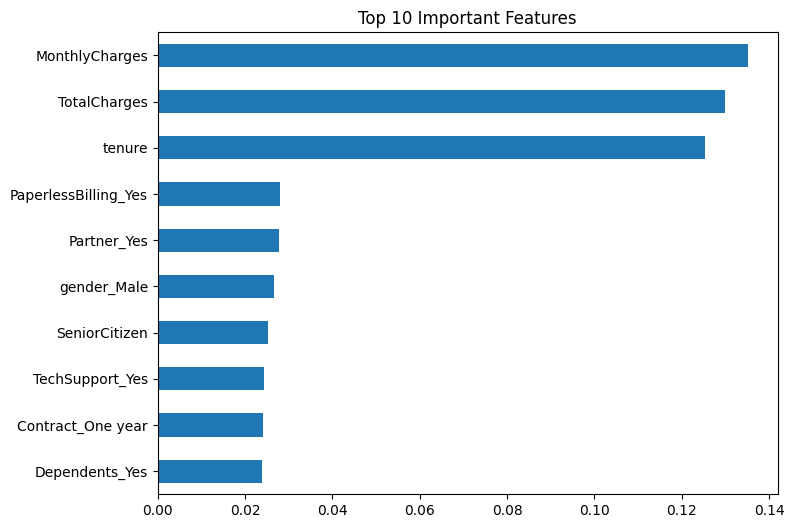

In [ ]:
# Convert target to numeric
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})

# Drop customerID
data.drop('customerID', axis=1, inplace=True)

# Encode categorical columns
cat_cols = data.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Split features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
top_features.plot(kind='barh', figsize=(8,6))
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features")
plt.show()